In [1]:
import graphmethods as gr
from preprocessor import *
from recommender import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.preprocessing import LabelEncoder
from stellargraph import StellarGraph
from stellargraph.mapper import Attri2VecNodeGenerator, GraphSAGENodeGenerator
import tensorflow as tf
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.neighbors import NearestNeighbors

[nltk_data] Downloading package stopwords to /Users/heidi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
2022-05-19 12:28:57.928387: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
nodes = pd.read_csv("data/nodes.csv")
nodes = nodes.set_index("Id")
alinks = pd.read_csv("data/alinks.csv")
bilinks = pd.read_csv("data/bilinks.csv")
clinks = create_clinks(bilinks,nodes)

## Product graph
with links connecting similar products giveb by Amazon's (`alinks`)

In [3]:
G = nx.from_pandas_edgelist(alinks, source='source', target='target')

In [4]:
missing_nodes = list(set(nodes.index)-set(G.nodes()))
len(missing_nodes)
G.add_nodes_from(missing_nodes)

In [5]:
gr.net_prop_dict(G)


{'no_of_nodes': 542664,
 'no_of_edges': 236429,
 'transitivity': 0.007141223411014257,
 'average_clustering': 0.003951630468176218,
 'edge_density': 1.6057188950565498e-06,
 'average_degree': 0.8713642327480725,
 'total_triangles': 3372,
 'number_connected_components': 307498}

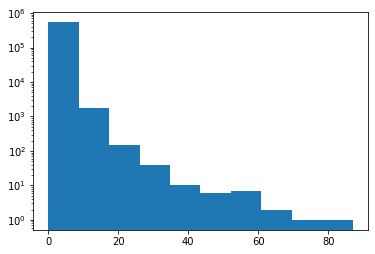

In [6]:
degrees = [G.degree(n) for n in G.nodes()]
plt.hist(degrees)
plt.yscale("log")
plt.show()

In [7]:
degree_centrality = nx.degree_centrality(G)

In [8]:
closeness_centrality = nx.closeness_centrality(G)

In [9]:
eigenvector_centrality = nx.eigenvector_centrality(G)

In [10]:
katz_centrality = nx.katz_centrality(G)

In [11]:
pagerank_centrality = nx.pagerank(G)

In [42]:
#proximity_prestige = gr.proximity_prestige(G) # bug: zero division?!

In [43]:
centralities = {"degree": degree_centrality, "closeness": closeness_centrality, "eigen": eigenvector_centrality, 
                "katz": katz_centrality, "pagerank": pagerank_centrality}
top = pd.DataFrame(columns=["Id","measure","value"])
for centr in centralities:
    sorted_centrality = {k: v for k, v in sorted(centralities[centr].items(), key=lambda item: item[1], reverse=True)}
    top10_ids = list(sorted_centrality.keys())[:10]
    top10_vals = list(sorted_centrality.values())[:10]
    top = pd.concat([top, pd.DataFrame({"Id": top10_ids, "measure": centr, "value": top10_vals})],axis=0)

In [45]:
top = top.set_index("Id")
top = top.join(nodes[["Title","Group"]])
top

/opt/anaconda3/envs/NS/lib/python3.8/site-packages/pandas/core/indexes/base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


,measure,value,Title,Group
Id,,,,
27832,degree,0.000103,The Winter's Tale (Folger Shakespeare Library),Book
27832,closeness,0.000185,The Winter's Tale (Folger Shakespeare Library),Book
27832,katz,0.023843,The Winter's Tale (Folger Shakespeare Library),Book
27832,pagerank,0.000051,The Winter's Tale (Folger Shakespeare Library),Book
45146,degree,0.000111,Taber's Cyclopedic Medical Dictionary -Thumb-I...,Book
45146,katz,0.021201,Taber's Cyclopedic Medical Dictionary -Thumb-I...,Book
45146,pagerank,0.000054,Taber's Cyclopedic Medical Dictionary -Thumb-I...,Book
50483,eigen,0.0728,Gilda,DVD
55387,degree,0.000105,Getting to Yes: Negotiating Agreement Without ...,Book


## Bipartite graph of products and customers
with only links between products and customers (`bilinks`)

In [14]:
bilinks.head()

,Id,CId,Rating
0,1,C110643,5.0
1,2,C133242,5.0
2,3,C3314,5.0
3,4,C217326,4.0
4,5,C7580,5.0


In [15]:
# collect bi-edge tuples into list
biedges = []
for i in range(bilinks.shape[0]):
    biedges.append((bilinks.loc[i,"CId"],bilinks.loc[i,"Id"]))
# collect ids of customer nodes and product nodes into lists
customers = list(bilinks.CId.unique())
products = list(bilinks.Id.unique())
len(customers), len(products), len(biedges)

(229313, 410480, 410480)

In [16]:
from networkx.algorithms import bipartite

biG = nx.Graph()
#nodes
biG.add_nodes_from(customers, bipartite="customers")
biG.add_nodes_from(products, bipartite="products")
#edges
biG.add_edges_from(biedges)
bipartite.is_bipartite(biG)

True

In [17]:
gr.net_prop_dict(biG)

{'no_of_nodes': 639793,
 'no_of_edges': 410480,
 'transitivity': 0,
 'average_clustering': 0.0,
 'edge_density': 2.005597168591275e-06,
 'average_degree': 1.2831650236873489,
 'total_triangles': 0,
 'number_connected_components': 229313}

## Another product graph
with edges connecting products of same customer (`clinks`)

In [18]:
CG = nx.from_pandas_edgelist(clinks, source='source', target='target')

In [19]:
missing_nodes = list(set(nodes.index)-set(CG.nodes()))
print(len(missing_nodes))
CG.add_nodes_from(missing_nodes)

422303


In [21]:
print("Number of nodes: ", nx.number_of_nodes(CG))
print("Number of edges: ", nx.number_of_edges(CG))

Number of nodes:  542664
Number of edges:  35046691


In [22]:
sourceLinksCG = [link[0] for link in CG.edges()]
print(".")
targetLinksCG = [link[1] for link in CG.edges()]
print(".")
linksCG = pd.DataFrame({"source": sourceLinksCG, "target": targetLinksCG})
print(".")
linksCG.to_csv("data/clinks.csv",index=False)

.
.
.
